**MARIA MARCELA PASTRANA DAVID - CC 43269287**

# Proyecto 03 - Sistemas de Recomendación

## Dataset: STEAM

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Son dos archivos, uno de calificaciones y otro de información sobre los juegos.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset. Sin embargo, **deberás** modificarlas para hacer un mejor manejo de datos. Algunas cosas a las que deberás prestar atención (tal vez no a todas):
1. Tipos de datos: elige tipos de datos apropiados para cada columna.
2. Descartar columnas poco informativas.
3. Guardar en memoria datasets preprocesados para no tener que repetir código que tarde en correr.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿cuáles son los juegos más populares?¿Y los menos populares?

### Filtro Colaborativo

Deberás implementar un sistema de recomendación colaborativo para este dataset. Ten en cuenta:

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.

Puedes implementar un filtro colaborativo a partir de la similitud coseno o índice de Jaccard. ¿Puedes utilizar los métodos de la librería Surprise? Si no es así, busca implementaciones (por ejemplo, nuevas librerías) que sean apropiadas.

Para comenzar a trabajar, puedes asumir que cada entrada es un enlace entre una persona usuaria y un item, **independientemente** de si la crítica es buena o mala. 

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo harías para ponerle un valor a la calificación?
1. ¿Cómo harías para agregar contenido? Por ejemplo, cuentas con el género, precio, fecha de lanzamiento y más información de los juegos.
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

## 0. INSTRUCCIONES DE UNICA EJECUCIÓN PARA EXTRAER DATASETS DE INTERES ##

**Importante** ESTA SECCIÓN SÓLO SE CORRE LA PRIMERA VEZ Y POR ESTO EN EL ENTREGABLE SE ENVIARA COMENTADA PORQUE TARDA MUCHO EN CARGAR EL DATASET ORIGINAL Y SE PARTE DE LOS DATASETS EXTRAIDOS AL FINAL DE DICHA SECCIÓN.

In [1]:
import gzip
import pandas as pd

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

**Reviews**

In [2]:
contador = 0
data_reviews = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
n = 10
###for l in parse('steam_reviews.json.gz'):
###    if contador%n == 0:
###        data_reviews.append(l)
###    else:
###        pass
###    contador += 1


In [3]:
#data_reviews = pd.DataFrame(data_reviews)

In [4]:
#data_reviews.head()

In [5]:
#data_reviews.tail()

In [6]:
#data_reviews.isna().sum()

**Games**

In [7]:
data_games = []
#for l in parse('steam_games.json.gz'):
#    data_games.append(l)
#data_games = pd.DataFrame(data_games)

In [8]:
#data_games.head()

In [9]:
#data_games[data_games.id == '725280']

In [10]:
#data_games.isna().sum()

-----------------------------------------------------------------------------------------------

**DATASET FILTRADO CON COLUMNAS DE INTERES**

In [11]:
#ReviewsFiltrado = data_reviews[['username', 'hours', 'product_id']]

In [12]:
#ReviewsFiltrado

In [13]:
#ReviewsFiltrado.info()

In [14]:
#GamesFiltrado = data_games[['id', 'app_name']]

In [15]:
#GamesFiltrado

In [16]:
#if False:
#    ReviewsFiltrado.to_csv('C:/Datos/Cursos y capacitaciones/DataScience-Acamica/Notebooks/Sprint3/P3_reviews.csv', index= False)
#    GamesFiltrado.to_csv('C:/Datos/Cursos y capacitaciones/DataScience-Acamica/Notebooks/Sprint3/P3_games.csv', index= False)
 

## 1. RECARGA DATASET E INICIO DE PREPROCESAMIENTO
La primera sección de este Notebook se utiliza para tomar el dataset inicial entregado para ser procesado y se extraen de él unicamente las columnas de interes para el primer modelo de sistema de recomendación. 

Las pasadas instrucciones sólo fueron ejecutadas una vez y en las siguientes ejecuciones sólo es necesario tener los archivos .csv ya predefinidos para continuar la construcción del modelo.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd

import gc #garbage collector

from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Se cargan los datos preprocesados en el primer bloque de este notebook, pero que ya continen unicamente los datos de interes actual para el proyecto.

**Carga de Reviews**

Se carga dataset preprocesado de nombre P3_reviews.csv, es un dataset de mas de 700 mil registros, de el se descartan registros con valores nulos.

In [18]:
ReviewsFiltrado = pd.read_csv(r'C:\Datos\Cursos y capacitaciones\DataScience-Acamica\Notebooks\Sprint3\P3_reviews.csv', dtype={'Rating': np.int8, 'movie_id': np.int16})
print(ReviewsFiltrado.shape)
ReviewsFiltrado.head()

(779307, 3)


,username,hours,product_id
0,Chaos Syren,0.1,725280
1,Ariman1,13.2,328100
2,freakfantom,0.1,725280
3,The_Cpt_FROGGY,7.8,631920
4,the_maker988,8.2,35140


In [19]:
ReviewsFiltrado.isna().sum()

username        18
hours         2637
product_id       0
dtype: int64

In [20]:
ReviewsFiltrado.dropna(inplace=True)

**Carga de Games**

Se carga dataset preprocesado de nombre P3_games.csv, es un dataset de mas de 32 mil registros, de el se descartan registros con valores nulos.

In [21]:
GamesFiltrado = pd.read_csv(r'C:\Datos\Cursos y capacitaciones\DataScience-Acamica\Notebooks\Sprint3\P3_games.csv', dtype={'Rating': np.int8, 'movie_id': np.int16})
print(GamesFiltrado.shape)


(32135, 2)


In [22]:
GamesFiltrado.isna().sum()

id          2
app_name    2
dtype: int64

In [23]:
GamesFiltrado.dropna(inplace=True)

In [24]:
GamesFiltrado['id'] = GamesFiltrado['id'].astype(np.int64)
GamesFiltrado.head()

,id,app_name
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,773570,Log Challenge


In [25]:
JuegosRespaldo = GamesFiltrado.copy()

## 2. EDA: ANÁLISIS EXPLORATORIO DE DATOS

Se exploran los datos contenidos en los 2 datasets en busca de valores atipicos y faltantes, sus tipos de datos

In [26]:
ReviewsFiltrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776652 entries, 0 to 779306
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   username    776652 non-null  object 
 1   hours       776652 non-null  float64
 2   product_id  776652 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.7+ MB


Este es dataset de 776652 registros

In [27]:
GamesFiltrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32132 entries, 0 to 32134
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        32132 non-null  int64 
 1   app_name  32132 non-null  object
dtypes: int64(1), object(1)
memory usage: 753.1+ KB


Este es dataset de 32132 registros

**Usuarios unicos**

Se extrae del dataset que tenemos de reviews la cantidad de usuarios con las que contamos en el dataset.

In [28]:
usuarios = ReviewsFiltrado.username.unique()

In [29]:
usuarios.size

539032

In [30]:
countId = ReviewsFiltrado["username"].value_counts()
countId

123                      213
Alex                     190
Chris                    154
Nick                     142
Matt                     137
                        ... 
Johhny SINS                1
Api                        1
Long Nose Garden Hose      1
A Gingerbreadstick         1
grey037                    1
Name: username, Length: 539032, dtype: int64

De la información anterior se observa que existen algunos usuarios que sólo tienen 1 review realizado, esto no es conveniente tenerlo en el modelo de recomendación, ya que estos al tener un unico juego no aportan al entrenamiento del modelo. 

Se parte a realizar las instrucciones para dejar solo usuarios que tengan mas de 2 registros de reviews en el dataset, codigo a continuación:

In [31]:
conteo = countId.to_frame()
conteo.shape
conteo.columns

Index(['username'], dtype='object')

In [32]:
#dir(countId)

In [33]:
nombres = countId.to_frame()[countId>2].index
nombres

Index(['123', 'Alex', 'Chris', 'Nick', 'Matt', 'Tom', 'John', 'Jack', 'Dan',
       'Saint Aaron',
       ...
       'Duck Tear Popper', 'mystic_headlock', 'Coplan',
       '[NB]Grandpa Bardock Junior', 'csgosell.com hellcase.com',
       'you already know who it is', 'headhunter', 'pato', 'Levi kohen',
       'Homuya [GER]'],
      dtype='object', length=41215)

In [34]:
ReviewsFiltrado.username.isin(nombres)

0         False
1          True
2         False
3          True
4         False
          ...  
779302     True
779303    False
779304    False
779305     True
779306    False
Name: username, Length: 776652, dtype: bool

In [35]:
ReviewsFiltrado1 = ReviewsFiltrado[ReviewsFiltrado.username.isin(nombres)].copy()

In [36]:
ReviewsFiltrado1.max()

username      󰀍 loopuleasa 󰀍
hours                18543.3
product_id            773650
dtype: object

In [37]:
ReviewsFiltrado1["username"].value_counts()

123               213
Alex              190
Chris             154
Nick              142
Matt              137
                 ... 
Mateescu12          3
BelgianMonster      3
Bahpu#              3
Liro Raériyo        3
Wakka               3
Name: username, Length: 41215, dtype: int64

Con la instrucción anterior se observa que los usuarios que quedaron todos ya tienen al menos 3 reviews.


**Crear columna con codigo usuario para no manejar nombre largo**

En esta sección se aplica la función labelEncoder para poder realizar el proceso de transformar los textos que contienen los nombres de los usuarios en un valor númerico, este código es mucho mas manejable para la implementación de los modelos en adelante.

In [38]:
ReviewsFiltrado1["usernameid"] = LabelEncoder().fit_transform(ReviewsFiltrado1.username)

In [39]:
ReviewsFiltrado1

,username,hours,product_id,usernameid
1,Ariman1,13.2,328100,2060
3,The_Cpt_FROGGY,7.8,631920,29144
6,Vonder,2.7,35600,30885
10,MrNinjaSquirrel,1.2,288690,19328
11,Puddle,1.2,308040,22521
...,...,...,...,...
779293,>Artik<,586.2,252490,663
779296,Banjo,290.4,252490,2913
779298,Slavic Psycho,3.9,252490,26200
779302,Vidaar,783.5,252490,30704


In [40]:
ReviewsFiltrado1.describe()

,hours,product_id,usernameid
count,212366.000000,212366.000000,212366.000000
mean,76.811539,247076.852933,20077.665521
std,308.348210,150441.460803,11726.051836
min,0.000000,10.000000,0.000000
25%,3.000000,200510.000000,10002.000000
50%,10.800000,250180.000000,20009.500000
75%,37.400000,341940.000000,29953.000000
max,18543.300000,773650.000000,41214.000000


**Crear atributo Ranking basado en el Nro de Horas jugadas**

En esta sección se parte del supuesto donde si el usuario estuvo una cantidad alta de horas en el juego es porque le daria un mayor ranking.
Como actualmente los valores de horas jugadas van de 0 a 28164, es un rango alto, se trata de llevar a un ranking de 1 a 5 solamente aplicandole algunas transformaciones a esta columna.


In [41]:
ReviewsFiltrado1[ReviewsFiltrado1.hours>200]

,username,hours,product_id,usernameid
830,Tuong,283.8,224900,29943
854,Nami M. May,1013.2,390340,19743
1031,aileigh,233.6,32900,33311
1318,Bob & Weave,391.7,385770,3828
1483,Dee,688.2,1840,7363
...,...,...,...,...
779223,Timothy,200.1,252490,29399
779238,Frank,371.8,252490,10352
779293,>Artik<,586.2,252490,663
779296,Banjo,290.4,252490,2913


In [42]:
Dfhoras=ReviewsFiltrado1.hours
Dfhoras

1          13.2
3           7.8
6           2.7
10          1.2
11          1.2
          ...  
779293    586.2
779296    290.4
779298      3.9
779302    783.5
779305    139.8
Name: hours, Length: 212366, dtype: float64

Se calculan los cuantiles para la columna de Horas Jugadas, determinando donde estan el 20%, 40%, 60%, 80% de los datos.

In [43]:
print(ReviewsFiltrado1.hours.quantile([0.20, 0.40, 0.60, 0.80]))
#np.percentile(ReviewsFiltrado['hours'],100)

0.2     2.1
0.4     6.7
0.6    16.9
0.8    52.4
Name: hours, dtype: float64


**Transformar columna de Horas a Ranking**

Para hacer la transformación de las horas a un puntaje entre 1 y 5, se realizan las siguientes funciones.
En la función se usan los quantiles calculados para la columna de horas como referencia.

In [44]:
def calcularPuntajeHoras(x):
    valor=0
    if x>0 and x<2.1:
      valor=1
    elif x>=2.1 and x<6.7:
      valor=2
    elif x>=6.7 and x<16.9:
      valor=3
    elif x>=16.9 and x<52.4:
      valor=4
    else: 
      valor=5
        
    return valor

In [45]:
def generarRanking(df_input):
    return df_input.apply(lambda x: calcularPuntajeHoras(x))

In [46]:
ReviewsFiltrado1["Ranking"]  = generarRanking(Dfhoras)
ReviewsFiltrado1.head(10)

,username,hours,product_id,usernameid,Ranking
1,Ariman1,13.2,328100,2060,3
3,The_Cpt_FROGGY,7.8,631920,29144,3
6,Vonder,2.7,35600,30885,2
10,MrNinjaSquirrel,1.2,288690,19328,1
11,Puddle,1.2,308040,22521,1
12,JKDarkseid,3.0,302390,13602,2
15,Hanzo,0.2,8880,12139,1
16,Harry,0.4,302390,12217,1
17,Erenussocrates,1.3,363520,9252,1
18,MLGarbage,9.5,35140,17264,3


In [47]:
ReviewsFiltrado1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212366 entries, 1 to 779305
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   username    212366 non-null  object 
 1   hours       212366 non-null  float64
 2   product_id  212366 non-null  int64  
 3   usernameid  212366 non-null  int32  
 4   Ranking     212366 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 8.9+ MB


### Graficas

Con la columna de Usernameid, si hacemos la grafica, se obtiene un grafico de barras casi uniformes, esta columna si recordamos se creo como un label encoder para cambiar los nombres, por lo tanto va llevando un consecutivo.

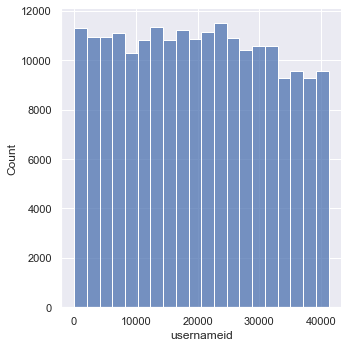

In [48]:
sns.displot(ReviewsFiltrado1['usernameid'], bins = 20) 

En la grafica de la columna horas en boxplot, se encuentra un grafico muy confuso, este atributo es flotante y esta demasiado repartido, no se encuentran los datos concentrados para hacer una grafica de este tipo, mas adelante se hará sobre la columna transformada Ranking y ahi si se puede visualizar mucho mejor.

<AxesSubplot:ylabel='hours'>

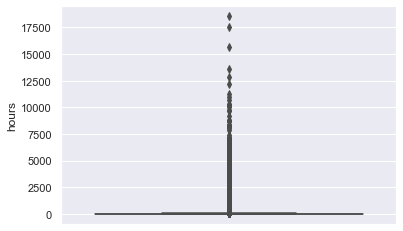

In [49]:
sns.boxplot(data = ReviewsFiltrado1, y = "hours", color='g')

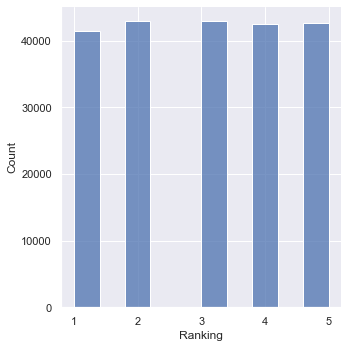

In [50]:
sns.displot(ReviewsFiltrado1['Ranking'], bins = 10) 

<AxesSubplot:ylabel='Ranking'>

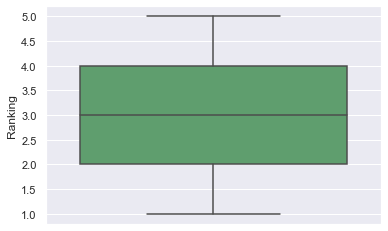

In [51]:
sns.boxplot(data = ReviewsFiltrado1, y = "Ranking", color='g')

En las graficas anteriores, tanto de barras como de boxplot podemos observar como se encuentran los datos de Ranking, en el boxplot se ve la mayor concentración entre 2 y 4. 

## 3. ENTRENAMIENTO

###    A. Dataset y Train/test split

Primero, se debe llevar el dataset al formato que le gusta a la biblioteca Surprise, para esto se utiliza el Reader().

In [52]:
ReviewsFiltrado1.shape

(212366, 5)

In [53]:
reader1 = Reader()
N_filas = 212366 # Con esta instrucción se podria filtrar el dataset N_filas, pero se toma todo en la ultima ejecución

data1 = Dataset.load_from_df(ReviewsFiltrado1[['usernameid', 'product_id', 'Ranking']][:N_filas], reader1)
trainset, testset = train_test_split(data1, test_size=.25)

### B. Modelo SVD
Es un algoritmo basado en Matrix Factorization, popularizado en Netflix prize.

**MODELO BENCHMARK**

In [54]:
data1

In [55]:
from surprise import SVD
svdJuegos = SVD(random_state=42)

In [56]:
svdJuegos.fit(trainset)

In [57]:
predictions2 = svdJuegos.test(testset)

### C. Validación de predicciones

In [58]:
predictions2[1]

Prediction(uid=13662, iid=282070, r_ui=4.0, est=3.009728887423802, details={'was_impossible': False})

Para buscar la predicción de un usuario en particular hacia un juego, por ejemplo: el usuario **347** con el juego **761140 - Lost Summoner Kitty**, seria de la siguiente forma:


In [59]:
svdJuegos.predict(347,761140)

Prediction(uid=347, iid=761140, r_ui=None, est=3.0367659219067136, details={'was_impossible': False})

Como vemos, este sistema ya esta realizando las predicciones, donde estima 3.0, es el puntaje estimado que tendria la matriz de recomendación para el juego 761140 - Lost Summoner Kitty para el usuario 347.

Si probamos otro como el juego **48700 - Mount & Blade: Warband**, veamos cual es el valor que predice de recomendación.

In [60]:
svdJuegos.predict(347,48700)

Prediction(uid=347, iid=48700, r_ui=None, est=4.691369167757578, details={'was_impossible': False})

donde estima 4.4, es el puntaje estimado que tendria la matriz de recomendación para el juego "48700 - Mount & Blade: Warband" para el usuario 347, este puntaje es más alto que el anterior.

In [61]:
#ReviewsFiltrado1[ReviewsFiltrado1.username=='123']

### D. Recomendaciones a Usuario

Se selecciona un usuario al cual recomendar, se identifican los juegos vistos por dicho usuario, paso seguido se identifican los juegos que no ha visto de todo el dataset de Juegos y se aplica predicción para todos los juegos no vistos de forma de calcular el Score Estimado y basado en este score identificar el top 10 para hacerle las recomendaciones al usuario.

In [62]:
#usuario = 347 - El que mas ha jugado
usuario = 14079  #Jerry
rating = 5   # le pedimos peliculas a las que haya puesto 4 o 5 estrellas
df_user = ReviewsFiltrado1[(ReviewsFiltrado1['usernameid'] == usuario) & (ReviewsFiltrado1['Ranking'] >= rating)]

In [63]:
df_user

,username,hours,product_id,usernameid,Ranking
226091,Jerry,67.5,550650,14079,5
227526,Jerry,191.0,99900,14079,5
251701,Jerry,62.6,218680,14079,5
253613,Jerry,80.5,265610,14079,5
389759,Jerry,636.6,440,14079,5
393615,Jerry,374.1,440,14079,5
498697,Jerry,191.2,244450,14079,5
657661,Jerry,306.7,8930,14079,5
740676,Jerry,123.4,227300,14079,5
779305,Jerry,139.8,252490,14079,5


In [64]:
df_user.product_id

226091    550650
227526     99900
251701    218680
253613    265610
389759       440
393615       440
498697    244450
657661      8930
740676    227300
779305    252490
Name: product_id, dtype: int64

In [65]:
GamesFiltrado[GamesFiltrado.id==328100]

,id,app_name
2834,328100,Gunspell - Steam Edition


In [66]:
GamesFiltrado

,id,app_name
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,773570,Log Challenge
...,...,...
32130,773640,Colony On Mars
32131,733530,LOGistICAL: South Africa
32132,610660,Russian Roads
32133,658870,EXIT 2 - Directions


En el dataset df_user, tengo algunos de los resultados del usuario seleccionado donde tiene el ranking mayor a 5 y cuales Juegos ha utilizado con su puntaje basado en la cantidad de horas jugadas. 

Ahora, de acuerdo al conocimiento de Él y otros usuarios, en lo que se basan los sistemas de recomendación de filtro colaborativo, se partirá a obtener en otro dataset cuales son los juegos que se le podrian recomendar a dicho usuario.

In [67]:
usuario_vistas = ReviewsFiltrado1[ReviewsFiltrado1['usernameid'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(30, 5)


,username,hours,product_id,usernameid,Ranking
44904,Jerry,3.0,263680,14079,2
72185,Jerry,35.7,220240,14079,4
88766,Jerry,11.0,265550,14079,3
91012,Jerry,1.7,39190,14079,1
99359,Jerry,0.4,454890,14079,1


En el dataset anterior, usuario_vistas, ya nos quedan todos los videojuegos jugados por el usuario seleccionado, ahora se revisara el listado de todos los videojuegos que tenemos para luego excluir los que ya ha visto el usuario al cual le voy a dar recomendaciones.

In [68]:
JuegosRespaldo

,id,app_name
0,761140,Lost Summoner Kitty
1,643980,Ironbound
2,670290,Real Pool 3D - Poolians
3,767400,弹炸人2222
4,773570,Log Challenge
...,...,...
32130,773640,Colony On Mars
32131,733530,LOGistICAL: South Africa
32132,610660,Russian Roads
32133,658870,EXIT 2 - Directions


Debo extraer cuales son los juegos que mi usuario al cual le quiero entregar una recomendación no ha jugado, basandonos en que no ha tenido reviews sobre ellos.

In [69]:
#Extraigo en un dataFrame los Juegos que el usuario ha visto.
JuegosVistosSoloProducto = usuario_vistas.product_id

In [70]:
JuegosUnicos = JuegosVistosSoloProducto.drop_duplicates()

In [71]:
JuegosUnicos.shape

(28,)

Existen 28 juegos que el usuario ha jugado de la lista de juegos, ahora debemos extraer en otro Dataset los que no ha visto de todo el grupo de juegos restantes para a ellos mirarlse su predicción y darle al usuario las recomendaciones

In [72]:
#JuegosRespaldo.merge(JuegosUnicos, how='inner', on='a')
prueba = JuegosRespaldo.copy()
#Merge left de todos los juegos con los juegos vistos por el usuario, los que en product_id quedan con Nulos son los que no vio.
prueba2 = prueba.merge(JuegosUnicos, how='left', left_on='id', right_on='product_id')

In [73]:
JuegosNoVistos = prueba2[prueba2.product_id.isnull()]
JuegosNoVistos

,id,app_name,product_id
0,761140,Lost Summoner Kitty,NaN
1,643980,Ironbound,NaN
2,670290,Real Pool 3D - Poolians,NaN
3,767400,弹炸人2222,NaN
4,773570,Log Challenge,NaN
...,...,...,...
32127,773640,Colony On Mars,NaN
32128,733530,LOGistICAL: South Africa,NaN
32129,610660,Russian Roads,NaN
32130,658870,EXIT 2 - Directions,NaN


En la siguiente instrucción se obtienen todas las predicciones para estos videojuegos que no se han jugado por el usuario escogido.

In [74]:
JuegosNoVistos['Estimate_Score'] = JuegosNoVistos['id'].apply(lambda x: svdJuegos.predict(usuario, x).est)

<ipython-input-74-103eb994968b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JuegosNoVistos['Estimate_Score'] = JuegosNoVistos['id'].apply(lambda x: svdJuegos.predict(usuario, x).est)


In [75]:
JuegosNoVistos = JuegosNoVistos.sort_values('Estimate_Score', ascending=False)
print(JuegosNoVistos.head(10))

           id                  app_name  product_id  Estimate_Score
58       4000               Garry's Mod         NaN        5.000000
22842  394360         Hearts of Iron IV         NaN        5.000000
30006  107410                    Arma 3         NaN        5.000000
29680  221100                      DayZ         NaN        4.921842
25015  377160                 Fallout 4         NaN        4.917819
387     48700    Mount & Blade: Warband         NaN        4.896218
26953  271590        Grand Theft Auto V         NaN        4.872475
15616  435150  Divinity: Original Sin 2         NaN        4.842467
23230  281990                 Stellaris         NaN        4.813451
7849   482730     Football Manager 2017         NaN        4.787490


En el resultado anterior, nos damos cuenta de las 10 primeras recomendaciones que le daria nuestro sistema de recomendación al usuario de nombre Jerry, con usernameid 14079. 



## 4. EVALUACIÓN

Para el conjunto de testset, evaluamos el error RMSE entre las predicciones y las verdaderas calificaciones que le habían dado a los juegos.

In [76]:
from surprise import accuracy

accuracy.rmse(predictions2)

RMSE: 1.1144


1.1143968637223256

## 5. OPTIMIZACIÓN DE PARÁMETROS

### A. VALIDACIÓN CRUZADA

Haciendo un gráfico del desempeño del modelo en función del número de factores del `SVD`

In [77]:
from surprise.model_selection import cross_validate

rmse_test_means = []
factores = [2,4,5,6, 8,16,32,64,128,256,512]

for factor in factores:
    print(f'\nNúmero de Factores: {factor}')
    algo = SVD(n_factors=factor)
    cv = cross_validate(svdJuegos, data1, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))


Número de Factores: 2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.1209  1.1210  1.1185  1.1202  0.0011  
Fit time          6.90    6.61    6.56    6.69    0.15    
Test time         0.53    0.50    0.52    0.52    0.01    

Número de Factores: 4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.1175  1.1166  1.1263  1.1201  0.0044  
Fit time          6.31    6.24    6.45    6.33    0.09    
Test time         0.50    0.51    0.51    0.51    0.01    

Número de Factores: 5
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.1204  1.1206  1.1203  1.1205  0.0001  
Fit time          6.45    6.42    6.47    6.45    0.02    
Test time         0.41    0.52    0.51    0.48    0.05    

Número de Factores: 6
Evaluating RMSE of algorithm SVD on 3 split(s).

    

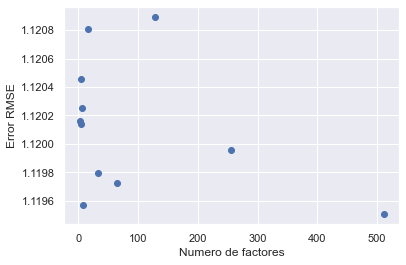

In [78]:
plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

De la validación cruzada, para esta ejecución, se obtienen la mejor media RMSE con el número de Factores 4, es la que tiene el valor más bajo del error.

Adicionalmente, esto se confirma en la gráfica, el punto más bajo de Error RMSE se encuentra con # de factores de 4.
De los datos 

NOTA: En otras ejecuciones estos factores van cambiando, en ocasiones me ha resultado que el factor da distinto, pero en la mayoria de las ejecuciones con factores 4 siempre da la menor metrica de error RMSE.
 
 

### B. OPTIMIZACIÓN CON GRIDSEARCHCV

Partiendo del factor que me dio mas bajo 4 y buscando adicional en el vecindario de este valor, se realizan optimización por GridSearchCV con otros de los hiperparametros de este modelo, para ver como se puede optimizar aún más. 

**NOTA**: El codigo a continuación se comenta en su parte de entrenamiento porque puede ser muy demorada su ejecución, se deja el resultado obtenido impreso a continuación como texto.

In [79]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [4, 5, 6, 7, 8, 16],'n_epochs': [20, 40, 80, 100], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}

#param_grid = {'n_factors': [128, 256, 512],'n_epochs': [20, 40, 80], 'lr_all': [0.5, 0.1, 0.05, 0.01, 0.005],
#              'reg_all': [0.002, 0.02, 0.2]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
#gs.fit(data1)

In [80]:
#print(gs.best_score['rmse'])
#print(gs.best_params['rmse'])

**Resultado GridSearchCV**

1.109625768030699
{'n_factors': 4, 'n_epochs': 80, 'lr_all': 0.002, 'reg_all': 0.02}

### C. Reentrenar modelo con parametros optimizados

In [94]:
svdJuegos2 = SVD(random_state=42, n_factors=4, n_epochs=80, lr_all=0.002, reg_all=0.02)

In [95]:
svdJuegos2.fit(trainset)

In [96]:
prediccionesF = svdJuegos2.test(testset)

In [97]:
accuracy.rmse(prediccionesF)

RMSE: 1.1020


1.1020328926002867

## 6. CONCLUSIONES

Se escoge como métrica para la medición el RMSE:

**Root Mean Squared Error** se popularizó bastante debido a que fue utilizada como métrica durante el Netflix Prize para evaluar el desempeño de los algoritmos. RMSE representa básicamente la desviación estándar de las diferencias entre los valores estimados y los valores reales. Se define como la raíz cuadrada de la diferencia entre la predicción del rating y su valor real al cuadrado.


Con el modelo de parámetros optimizados se obtiene una mejoria en el Error RMSE, comparado con el modelo inicial entrenado Benchmark, que inicialmente se encontraba:

In [85]:
print("RMSE modelo sin optimización de parámetros: ")
print(accuracy.rmse(predictions2))

print("RMSE modelo con optimización de parámetros: ")
print(accuracy.rmse(prediccionesF))

RMSE modelo sin optimización de parámetros: 
RMSE: 1.1144
1.1143968637223256
RMSE modelo con optimización de parámetros: 
RMSE: 1.1020
1.1020328926002867


De este sistema de recomendación entrenado, revisando sus resultados, se observa que aún el RMSE no es demasiado bueno, pero en el siguiente trabajo se trabajara en otros modelos y revisión de la forma de obtener el rating para tratar de identificar como mejorar estos resultados.



## 6. PROXIMOS PASOS

En este proyecto, como primer acercamiento a los modelos de sistemas de recomendación tuve aprendizajes de como abordar este dataset y preprocesarlo, conseguir las columnas de interes para un sistema de recomendación como son el id usuario y ranking, entrenar el modelo con la optimización de sus parametros empleando el SVD,  para seguir investigando y explorando planteo lo siguiente:

- Probar con otros modelos de sistemas de recomendación, vistos en la siguiente pagina:
https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html
    
- Explorar otras metricas para la evaluación de los modelos de recomendación. 

- Tratar de utilizar NLP sobre los comentarios de los usuarios para de ahi extraer el ranking y combinarlo con el numero de horas. 

- Otra opción seria emplear otro tipo de modelo de recomendación no por filtro colaborativo, sino basado en contenidos para la recomendaciones.
    